In [1]:
import pandas as pd
import numpy as np
import collections

data = pd.read_csv("201603250533-Antiquorum.csv", warn_bad_lines=True, error_bad_lines=False)
print data.columns

Index([u'Sale Name', u'Sale Date', u'Sale Location', u'Sale Number',
       u'Lot Number', u'Lot Title', u'Lot Description', u'High Estimate',
       u'Low Estimate', u'Price', u'Currency', u'Status', u'Maker',
       u'Image URL', u'Provenance', u'Literature', u'Notes', u'Url'],
      dtype='object')


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%m/%d/%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [5]:
yearData = data[pd.notnull(data['Sale Date'])]
yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

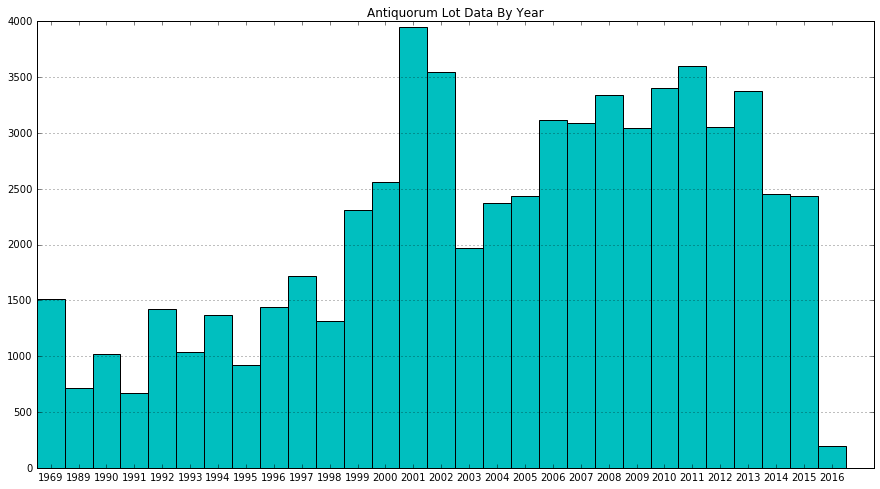

In [7]:
counter = collections.Counter(yearData['Year'])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(counter.values())), counter.values(), 1.0, color = 'c')
plt.xticks(np.arange(len(counter.values())) + 0.5, counter.keys())
plt.gca().yaxis.grid(True)
plt.title('Antiquorum Lot Data By Year')

In [8]:
df = {}
numbers = []

for x in data.columns:
    df[x] = data[pd.notnull(data[x])]
    numbers.append(len(df[x])/float(len(data)))

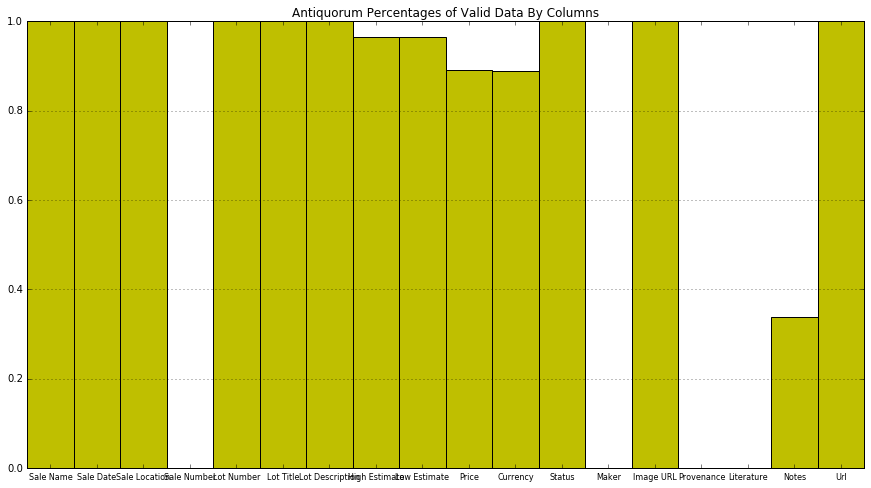

In [9]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(numbers)), numbers, 1.0, color = 'y')
plt.xticks(np.arange(len(numbers)) + 0.5, data.columns, fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Antiquorum Percentages of Valid Data By Columns')

In [28]:
#print list(yearData[yearData['Year'] == 1969]['Url'])

In [15]:
len(yearData)

63402

In [25]:
import urllib2
import cookielib
import mechanize
from mechanize._opener import urlopen


br = mechanize.Browser()
cj = cookielib.LWPCookieJar()
br.set_cookiejar(cj)

br.set_handle_equiv(True)
br.set_handle_gzip(True)
br.set_handle_redirect(True)
br.set_handle_referer(True)
br.set_handle_robots(False)

br = mechanize.Browser()
response = br.open("http://www.antiquorum.com/price-list/?page=1")
print response.read()

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:12: UserWarning: gzip transfer encoding is experimental!


httperror_seek_wrapper: HTTP Error 403: request disallowed by robots.txt

URLError: <urlopen error [Errno 65] No route to host>